# Erdos-Renyi random networks

In [1]:
import random

import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme(style="ticks", context="notebook")

## Write a random graph generator

In [8]:
def random_graph(N, p):
    
    G = nx.Graph()
    
    nodes = range(N)
    G.add_nodes_from(nodes)
    
    edges = []
    
    for i in nodes:
        for j in nodes[:i]:
            if random.random() < p:
                edges.append([i, j])
    
    G.add_edges_from(edges)
    
    return G

In [9]:
G = random_graph(10, 0.1)

In [24]:
N = 100
p = 0.8 / N 
G = random_graph(N, p)

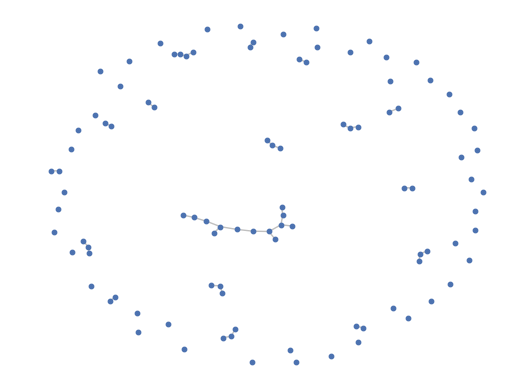

In [25]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

nx.draw_networkx(G, **params)

sb.despine(bottom=True, left=True)

plt.show()

## Analyse characteristics

In [81]:
N = 1000
p = 4 / N

G = nx.erdos_renyi_graph(N, p, seed=1)

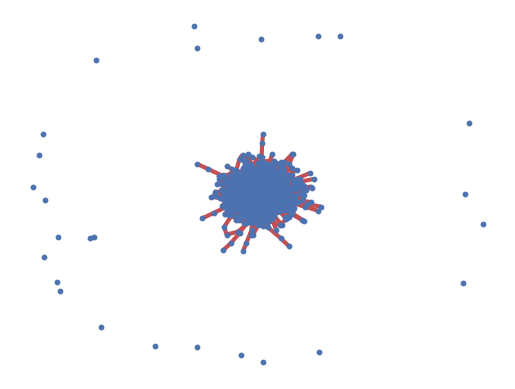

In [82]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos, **params)

# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# highlight largest connected component
nx.draw_networkx_edges(G0, pos=pos, width=3.0, edge_color="r")

# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.4, width=3.0, edge_color="r")


sb.despine(bottom=True, left=True)

In [83]:
print(f"Connected: {nx.is_connected(G)}")
print(f"# connected components: {len(list(nx.connected_components(G)))}")

print()
print(f"Size of largest connected component: {len(G0)}")
print(f"Prop. of nodes in it: {len(G0) / N:.2f}")

print()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(G)}")

Connected: False
# connected components: 26

Size of largest connected component: 974
Prop. of nodes in it: 0.97

Average degree: 3.978
Clustering coefficient: 0.0027341269841269842


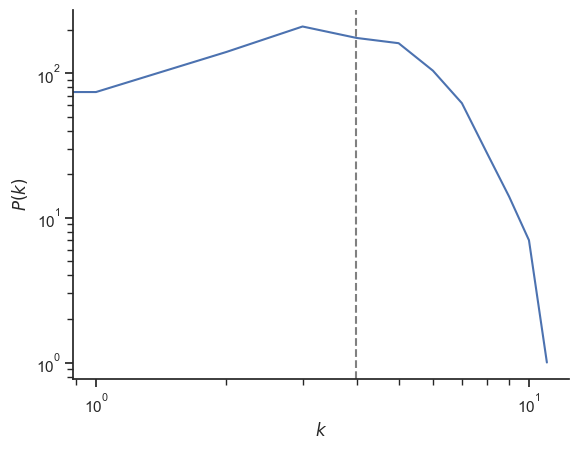

In [84]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()

ax.plot(deg, counts)

ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

## Vary the degree k 

In [98]:
N = 1000

ks = np.arange(0, 5.1, 0.1)

ps = ks / (N - 1)

n_reps = 10

props_arr = np.zeros((len(ps), n_reps))

for i, p in enumerate(ps):
    for rep in range(n_reps):
        G = nx.erdos_renyi_graph(N, p)
        
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        
        prop = len(G0) / N
        props_arr[i, rep] = prop

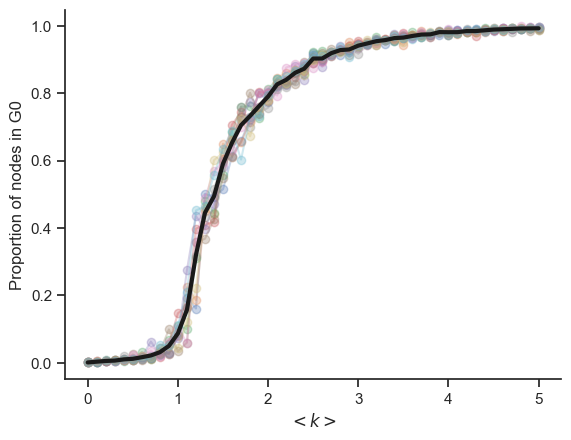

In [99]:
fig, ax = plt.subplots()

ax.plot(ks, props_arr[:, :], "-o", alpha=0.3)

ax.plot(ks, np.average(props_arr, axis=1), "k-", lw=3)

ax.set_ylabel("Proportion of nodes in G0")
ax.set_xlabel(r"$< k >$")

sb.despine()

## Configuration model

In [100]:
N = 20
p = 6 / N
G = random_graph(N, p)

degree_sequence = [d for n, d in G.degree()]

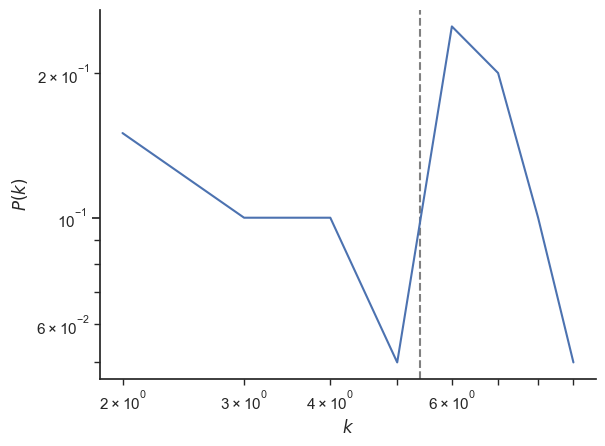

In [101]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()
ax.plot(deg, counts / N)
ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

In [106]:
G_conf = nx.configuration_model(degree_sequence)
G_conf = nx.Graph(G_conf)

degree_sequence_conf = [d for n, d in G.degree()]

In [107]:
print(G)

Graph with 20 nodes and 54 edges


In [108]:
print(G_conf)

Graph with 20 nodes and 48 edges


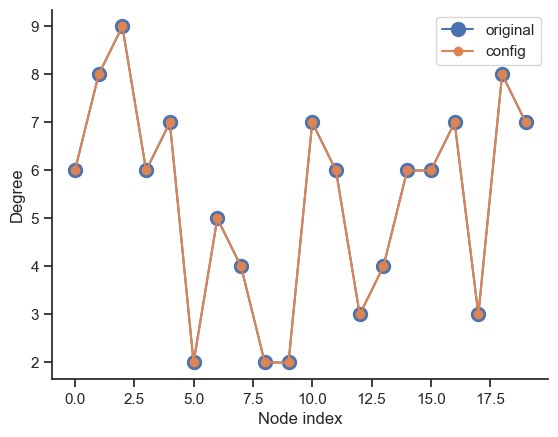

In [109]:
deg_conf, counts_conf = np.unique(degree_sequence_conf, return_counts=True)

fig, ax = plt.subplots()
ax.plot(degree_sequence, "o-", ms=10, label="original")
ax.plot(degree_sequence_conf, "o-", label="config")

ax.set_xlabel("Node index")
ax.set_ylabel("Degree")
#plt.yscale("log")
#plt.xscale("log")

ax.legend()

sb.despine()

In [ ]:
print(G)
print(G_conf)

In [110]:
pos = nx.spring_layout(G)

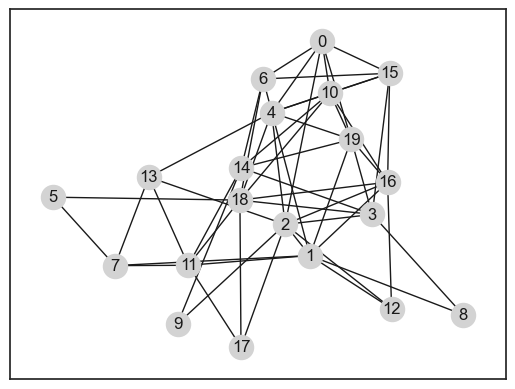

In [111]:
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color="lightgrey")

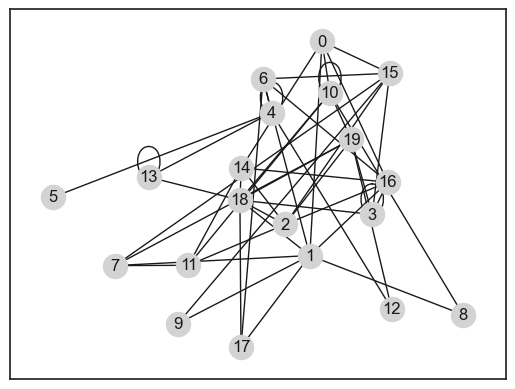

In [116]:
nx.draw_networkx(G_conf, pos=pos, node_color="lightgrey")

In [ ]:
#G_conf = G_conf.remove_edges_from(nx.selfloop_edges(G_conf))

In [117]:
pos

{0: array([0.20047498, 0.68928561]),
 1: array([ 0.14611836, -0.24670642]),
 2: array([ 0.03608725, -0.11064285]),
 3: array([ 0.42465229, -0.06698404]),
 4: array([-0.0246194 ,  0.37842248]),
 5: array([-1.        ,  0.00844082]),
 6: array([-0.062711  ,  0.52549913]),
 7: array([-0.72370023, -0.29077969]),
 8: array([ 0.82964333, -0.50513973]),
 9: array([-0.44433816, -0.54556328]),
 10: array([0.23582442, 0.46413804]),
 11: array([-0.39611898, -0.28933171]),
 12: array([ 0.51116579, -0.47879731]),
 13: array([-0.57260717,  0.09656657]),
 14: array([-0.15973125,  0.13676757]),
 15: array([0.50249717, 0.55024869]),
 16: array([0.49328175, 0.07412928]),
 17: array([-0.16110627, -0.64629093]),
 18: array([-0.16588655, -0.004293  ]),
 19: array([0.33107366, 0.26103078])}